# Ejemplo de principio a fin 


Vamos a utilizar el tramposo dataset de [canciones](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd)


In [1]:
# Con el tiempo te aprenderas las librarias de memoria :D
import pandas as pd  # recuerdas que puedes usar los alias que quieras para las librerias ? es costumbre llamara 'pd' a pandas
import numpy as np   # una genial implementacion de algebra lineal 
import matplotlib.pyplot as plt  # tambien es costumbre llamar 'plt' a el modulo 'pyplot' de 'matplotlib' 
from sklearn.model_selection import train_test_split # tiene como el 90% de cajas negras
# vamos a medir el error, saca la diferencia, lo eleva al cuadrado y sacas la media..
# lo que es en verdad,# lo que nosotros estamos diciendo y saca el error
def RMSE( y, y_sombrero):
    return( (np.mean( (y-y_sombrero)**2 )**.5  ))

In [2]:
# Vamos a leer el 'enorme' conjunto de datos que de paso esta limpio ~SEAMOS TRAMPOSOS
# yo la grabe como csv y aqui lo usaron como txt 'YearPredictionMSD.txt'
# aqui en el header=none le estamos diciendo que no tiene encabezado
songs = pd.read_csv('YearPredictionMSD.csv', header=None)
songs.head(6) #siempre es bueno mirar tus datos

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [3]:
# S...covarianza entre primero y segundo y luego la covarianza de no se que .. por ello deberian ser 72 y hay 90 columnas 
# S...primer lista donde X1,X2,X3,
columnas = ['Y']
for i in range(90):
    columnas.append('X'+str((i+1)))
columnas[0:6]

['Y', 'X1', 'X2', 'X3', 'X4', 'X5']

In [4]:
songs.columns = columnas
songs.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [5]:
# ojo, como estoy borrando si vuelvo a correr esta columna nos va a marcar error
# y es lo que voy a predecir
y = songs['Y']
# es la manera mas sencilla de borrar una columna 
del songs['Y']

In [8]:
songs.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
0,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Trabajaremos con una pequeña muestra del conjunto de datos original, CREES QUE ES TRAMPA ?


In [6]:
#basura, sample, y_basura, y = train_test_split(songs, y, test_size=.5, random_state=0) 
# es importante este detalle para que todos tengamos el mismo resultado
# La instruccion regresa los resultados exactamente asi, no puedes cambiar el orden de las variables 
# Es importante ese orden
# MUESTRA DEL 1% POR CUESTIONES DE COMPUTO PARA QUE EL EJERCICIO SE CORRA EN MENOS TIEMPO
# NOS DEVUELVE, BASURA, AQUI LA 'Y' VALDRA SOLO EL 1% ES PARA MENOS MEGAS. 
basura, sample, y_basura, y = train_test_split(songs, y, test_size=.01, random_state=0) # que esto se ponga rudo 5%

OJO! con las 4 particiones 

In [9]:
train, test, y_train, y_test = train_test_split(sample, y, test_size=0.3, random_state=0) # es importante este detalle para que todos tengamos el mismo resultado
train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
count,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,...,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000,3607.000000
mean,43.439813,1.838233,7.843950,1.055904,-6.693678,-9.293347,-2.775062,-1.910374,3.860422,1.928108,...,15.643247,-76.624650,41.739196,39.309374,0.252345,16.566176,-24.762104,4.400412,19.142246,1.048694
std,6.074459,51.754525,35.346062,16.434983,23.127575,13.082871,14.650660,8.268833,10.698569,6.548827,...,34.396010,182.105050,126.776798,97.826334,16.606213,117.888280,178.587033,13.154312,183.712206,21.721410
min,15.507890,-299.235000,-195.315000,-104.551230,-98.982520,-70.872270,-68.457410,-68.404510,-49.073190,-24.717490,...,-288.208090,-2477.145470,-995.515170,-935.635100,-144.234560,-1535.239830,-1837.612840,-70.498890,-1492.661460,-116.046460
25%,40.040910,-26.231380,-13.154780,-8.544435,-21.359140,-18.139435,-11.163835,-6.793090,-2.272215,-2.475610,...,-1.895870,-143.368450,-22.307560,-4.733860,-6.702350,-33.599850,-100.665185,-2.480085,-61.240560,-9.032645
50%,44.298650,9.535040,9.748390,-0.701040,-6.439130,-11.110460,-2.608440,-1.760730,3.937550,1.690710,...,9.035790,-56.622120,29.210590,34.116100,0.838420,15.801240,-20.867260,2.840010,6.949530,-0.268040
75%,47.858980,36.878205,29.317595,9.045085,7.724540,-1.946965,6.259845,2.961650,9.900625,6.195825,...,25.966530,12.110355,87.756285,78.822825,8.169625,69.841130,51.773350,9.561285,85.531250,9.971490
max,59.538850,266.555220,172.247550,152.659730,144.376390,112.971410,77.383020,44.704370,68.124620,36.582820,...,535.521860,1041.337360,1621.135400,1621.012760,125.271280,920.246740,2511.177770,103.097990,3697.698980,292.547090


In [10]:
from sklearn import decomposition
# solo dame solo los primeros 20 componentes principales == solo toma las variables de mayor impacto 
# obvio no puedes tener mas numeros de componentes principales que las variables (columnas)
# un objeto es como una bolsa y cuando creas una bolsa(un objeto) tienes adentro por ejemplo dentro de PCA 
# pca.explained_variance_.
pca = decomposition.PCA(n_components=20) # AQUI pca en MINUSCULA ES UNA VARIABLE
# entrenas el PCA ... 1o calcula la matriz de varianza-covarianza, saca valores y vactores propios.
# fit = acomoda (mete) ... CALCULOS PARA RELLENAR LA BOLSA
pca.fit(train) #Aqui pca es variable por ejemplo ponerle Variablepca o Var_pca, etc
# ya tiene mas datos, hace una transformacion de matrices.
# train tiene las x y el otro ya tiene las z ... ejemplo z1, z2
train_pca = pca.transform(train)
test_pca = pca.transform(test)

In [11]:
train_pca[0:6]

array([[  595.37236909, -1229.04555238,  -751.34415909,  -206.35163114,
          177.74327874,     8.69627027,  -232.59909055,   -35.60329697,
          372.24313054,    38.98849353,  -556.4190954 ,   -55.58069988,
         -238.68342943,   -27.59203355,   228.00902876,  -160.05393404,
          426.88596223,  -111.81546148,   -26.73141854,   -25.98029969],
       [   45.87244204,    75.226013  ,  -578.68663473,   -89.60486262,
          -29.27625563,    -9.76025228,  -236.72637648,    20.31900893,
         -243.15850718,    34.56034136,   173.54170991,     8.08797313,
         -110.75043501,  -168.25582876,   113.33360035,  -224.15967171,
          -34.43544293,     4.59823344,   140.11751842,   -51.05252493],
       [-1166.10232406,   181.35387002,  -361.49550613,  -378.79896924,
          179.22360428,  -225.93946937,   190.48522482,   134.61188696,
           37.378336  ,  -206.82503003,    16.00955097,   -32.36545802,
           72.73520685,    71.45348717,   257.59702678,   -55.

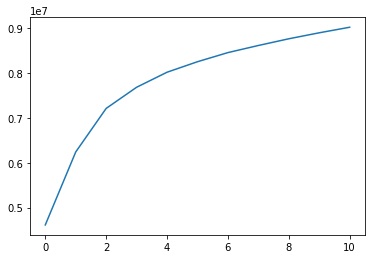

In [12]:
#guarda los valores estimados pca.explained_variance_ 
# al agregarle .cumsum hace una suma acumulada 1, 1,2=3, 1,2,3=6
# [0:11] le pedimos solo 11 
# 
plt.plot(pca.explained_variance_.cumsum()[0:11])

In [13]:
test_pca = pd.DataFrame( test_pca[:, 0:6])
test_pca.head()
train_pca = pd.DataFrame( train_pca[:, 0:6])

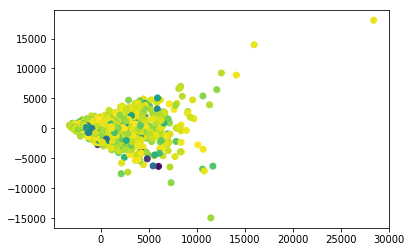

In [14]:
plt.scatter(train_pca[0], train_pca[1], c=y_train)

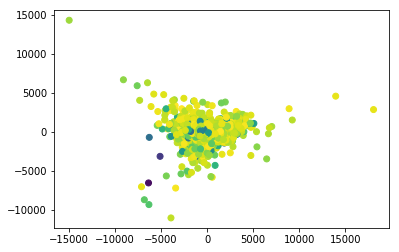

In [15]:
plt.scatter(train_pca[1], train_pca[2], c=y_train)

In [17]:
from sklearn.neighbors import KNeighborsClassifier #llama un modulo de la libreria
errores_knn = []
for i in range(round(len(train_pca)**.5)): # busqueda desde 1 hasta la raiz cuadrada de 3000
    knn = KNeighborsClassifier(n_neighbors= (i+1))    # knn mejor metodo de inputacion de datos en vez de la media.
    knn.fit(train_pca, y_train) 
    predictions = knn.predict(test_pca)          # estamos midiendo el error en anios, llega hasta mas de 19 anios 
    error = RMSE(predictions, y_test)           #aqui calculo el error
    errores_knn.append( error  )                # aqui lo agrego
errores_knn = np.array(errores_knn)

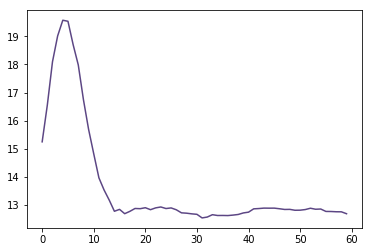

In [18]:
plt.plot(errores_knn, c='#5C4684') #el color pantone 2018

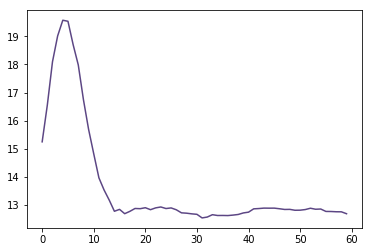

In [22]:
cotaSuperior = 28           # aqui le puedo mover al 13 u otro numero y es diferente la grafica
# el mas aproximado es el 28
plt.plot(errores_knn[errores_knn<cotaSuperior] , c='#5C4684') #el color pantone 2018
# estamos midiendo el error en anios, llega hasta mas de 19 anios 

In [25]:
y_test

303354    2006
392060    2003
299652    2001
200611    2004
370304    1988
47397     2009
294305    2010
507640    2005
485665    2010
65296     1996
468117    1981
510515    2006
172655    2003
171826    2002
354705    2004
316077    1994
108422    2008
95077     2004
140931    1991
305297    1982
440454    1993
260102    2002
398143    1996
88115     2005
366443    1988
138603    2007
350465    1990
198787    2003
312149    2006
363720    2001
          ... 
315631    1974
281104    2003
362212    2006
214057    1992
386144    2004
324088    2010
9282      2003
268733    1989
11863     2006
488010    2006
63320     1991
452901    2000
51606     1989
365185    2007
55830     2008
82168     1968
247760    2007
282654    1998
179565    2003
28449     1973
264580    1999
634       2008
120116    2004
332973    1998
407806    2010
13949     2002
53961     2004
30043     2003
471751    2003
360924    1983
Name: Y, Length: 1547, dtype: int64

In [26]:
list(map(lambda x: str(x), y_train))

['2000',
 '2002',
 '1995',
 '2002',
 '2000',
 '2007',
 '2007',
 '2003',
 '2010',
 '2009',
 '2006',
 '2006',
 '2008',
 '2008',
 '2005',
 '1994',
 '1982',
 '1999',
 '1973',
 '1973',
 '1988',
 '1995',
 '1994',
 '2006',
 '2009',
 '1999',
 '2000',
 '1994',
 '1987',
 '2009',
 '1983',
 '2004',
 '1999',
 '1993',
 '2009',
 '2008',
 '1995',
 '1995',
 '2003',
 '1986',
 '2008',
 '1998',
 '2007',
 '2008',
 '2001',
 '1992',
 '2000',
 '2002',
 '2001',
 '1999',
 '2008',
 '2003',
 '1989',
 '2008',
 '1994',
 '2005',
 '2002',
 '2003',
 '1994',
 '2007',
 '2003',
 '2002',
 '1966',
 '1980',
 '2008',
 '1999',
 '2006',
 '2004',
 '2007',
 '2004',
 '2006',
 '2002',
 '2006',
 '1997',
 '2002',
 '2000',
 '2003',
 '2008',
 '1988',
 '2006',
 '2001',
 '2008',
 '2001',
 '1996',
 '2004',
 '2001',
 '1993',
 '2007',
 '2007',
 '2003',
 '2005',
 '2006',
 '2001',
 '1987',
 '2001',
 '2003',
 '2003',
 '2005',
 '2006',
 '2005',
 '2003',
 '2001',
 '1968',
 '1997',
 '2003',
 '2007',
 '2006',
 '1996',
 '1975',
 '1973',
 '2001',
 

In [20]:
# y si clasificamos ?   #En class esta cancion esta en este rango de anios.
errores_knn_class = []
for i in range(round(len(train_pca)**.5)):
    knn = KNeighborsClassifier(n_neighbors= (i+1))
    knn.fit(train_pca,  list(map(lambda x: str(x), y_train)) ) # en las 2 lineas anteriores muestro lo que hace esta funcion
    predictions = knn.predict(test_pca)
    prediccionesCorrectas = [predictions == list(map(lambda x: str(x), y_test)) ] 
    accuracy= np.sum(prediccionesCorrectas) / len(predictions)
    errores_knn_class.append(accuracy)

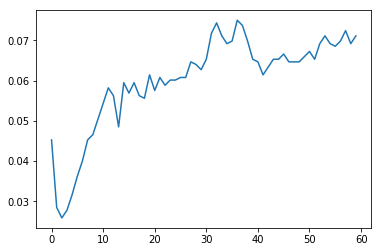

In [21]:
plt.plot(errores_knn_class)